In [1]:
#%%
%matplotlib inline
import pandas as pd
import plotly.plotly as py
import ast
import geopandas as gpd
import urllib2
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
min_max_scaler = preprocessing.MinMaxScaler()

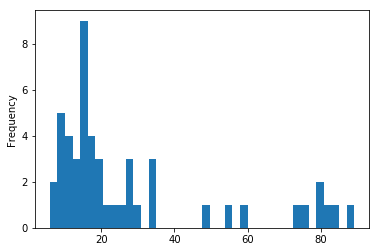

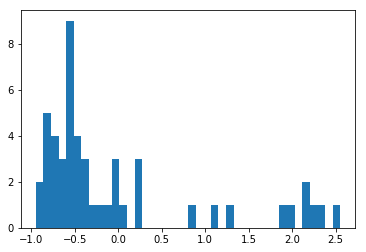

In [2]:
seleCol =  range(40,45)
seleCol.append(1)

####  read law scores
laws = pd.read_csv('laws.csv', delimiter=' ', header=None, usecols=seleCol)
laws.columns = ['state', 'total_score','curved_score','grade','2010_gun_death_rate','2009_gun_export_rates']
laws.set_index('state', inplace = True)
#laws.to_csv('laws_filter.csv')
laws = pd.read_csv('laws_filter.csv', delimiter=',')
laws.sort_values(laws.columns[0], ascending = True, inplace = True)
laws.reset_index(drop=True, inplace = True)
#read state code
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
laws['code']=df['code']
laws = laws[['code','state','curved_score']]

#sklearn.preprocessing.robust_scale(X, axis=0, with_centering=True, \
#with_scaling=True, quantile_range=(25.0, 75.0), copy=True)[source]¶
laws['curved_score'].plot.hist(bins=40)
plt.show()
plt.hist(preprocessing.scale(laws['curved_score']), bins=40)
plt.show()

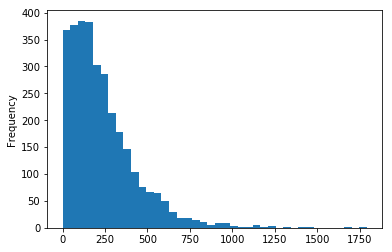

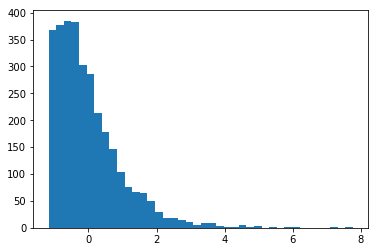

In [3]:
#### read crime rate
crime = pd.read_csv('crime_data_w_population_and_crime_rate.csv', 
                   usecols=[0, 1, 2, 21, 22, 23])
#create FIPS code by combining FIPSstate and FIPScity
crime['FIPStxt'] = pd.to_numeric(crime.FIPS_ST.apply(str)+
     crime.FIPS_CTY.apply(str).str.zfill(3))

crime['crime_rate_per_100000'].plot.hist(bins=40)
plt.show()
plt.hist(preprocessing.scale(crime['crime_rate_per_100000']), bins=40)
plt.show()
######

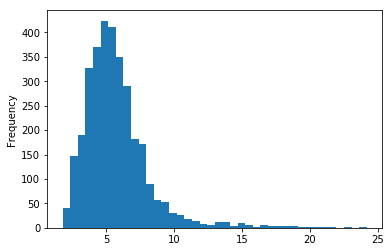

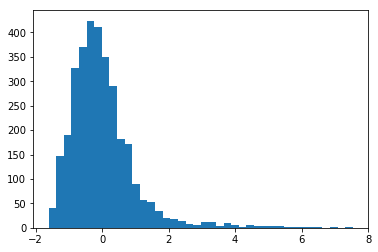

In [4]:
#### read 2015 unemployment rate and household income
#### No income data from PR
eco = pd.read_csv('Unemployment.csv',usecols=[0, 1, 2, 41, 46])
eco['Median_Household_Income_2015'] = eco['Median_Household_Income_2015'].str.replace(',','')
eco['Median_Household_Income_2015'] = pd.to_numeric(eco['Median_Household_Income_2015'])
eco['Median_Household_Income_2015'].fillna((eco['Median_Household_Income_2015'].mean()), inplace=True)
eco['Unemployment_rate_2015'].fillna((eco['Unemployment_rate_2015'].mean()), inplace=True)
eco['Unemployment_rate_2015'].plot.hist(bins=40)
plt.show()
plt.hist(preprocessing.scale(eco['Unemployment_rate_2015']), bins=40)
plt.show()
######

In [5]:
####containing 2015 Estimated percent of people of all ages
poverty = pd.read_csv('PovertyEstimates.csv',usecols=[0, 11])
#missing value'
poverty.rename(index=str, columns={'CI90LBALLP_2015':'poverty_rate'}, inplace=True)
poverty.ix[561,['poverty_rate']]=  0 
poverty['poverty_rate'] = pd.to_numeric(poverty['poverty_rate'])
#set missing value by median
poverty['poverty_rate'].fillna((poverty['poverty_rate'].mean()), inplace=True)
####

/Users/Xin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



In [6]:

###Sources: Census Bureau,2011-2015 American Community Survey 5-yr average.
edu = pd.read_csv('Education.csv',usecols=[0, 45])
edu.rename(index=str, columns={'Percent of adults completing some college or associate\'s degree, 2011-2015':'college_rate'}, inplace=True)
edu['college_rate'].fillna((edu['college_rate'].mean()), inplace=True)
####

(1499, 7)


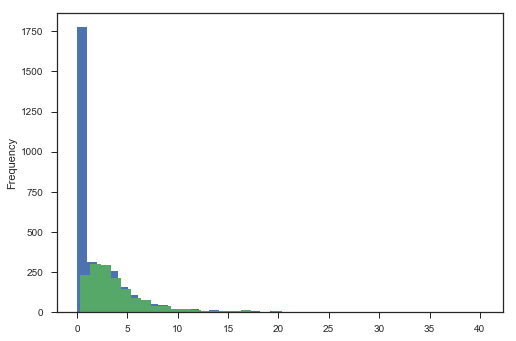

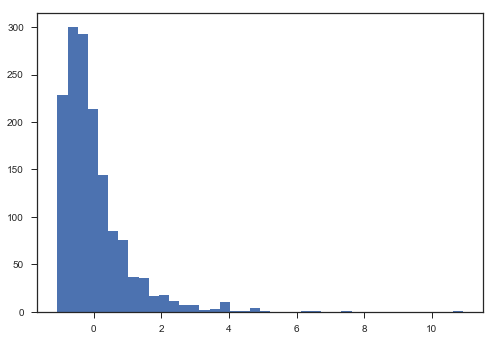

In [181]:
####cdc firearm death 1999-2015
fire = pd.read_csv('Underlying Cause of Death, 1999-2015.txt', 
                    delimiter='\t') 
fire['Deaths'] = pd.to_numeric(fire['Deaths'], errors='coerce')
fire['Population'] = pd.to_numeric(fire['Population'])
fire['fire_rate'] = 100000.0*fire['Deaths']/fire['Population']
#fill nan with 0
fire['fire_rate'] = fire['fire_rate'].fillna(value=0.0)
#round
fire['fire_rate'] = fire['fire_rate'].round(2)
fire['fire_rate'].plot.hist(bins=40)
fire = fire[fire.fire_rate != 0]
fire['fire_rate'].plot.hist(bins=40)
print fire.shape

plt.show()
plt.hist(preprocessing.scale(fire['fire_rate']), bins=40)
plt.show()
####

In [277]:
#normalize data
laws['curved_score'] = preprocessing.minmax_scale(laws['curved_score'])
eco['Unemployment_rate_2015'] = preprocessing.minmax_scale(eco['Unemployment_rate_2015'])
eco['Median_Household_Income_2015'] = preprocessing.minmax_scale(eco['Median_Household_Income_2015'])
crime['crime_rate_per_100000'] = preprocessing.minmax_scale(crime['crime_rate_per_100000'])
poverty['poverty_rate'] = preprocessing.minmax_scale(poverty['poverty_rate'])
edu['college_rate'] = preprocessing.minmax_scale(edu['college_rate'])
fire['fire_rate']  = preprocessing.minmax_scale(fire['fire_rate'] )

In [282]:
#merge to one dataframe
allData = pd.merge(eco, poverty, on='FIPStxt')
allData = pd.merge(allData, edu, left_on='FIPStxt', right_on='FIPS Code')
allData = pd.merge(allData, crime, on='FIPStxt')
allData = pd.merge(allData, fire, left_on='FIPStxt', right_on='County Code')
allData = pd.merge(allData, laws, left_on='State', right_on='code')
#allData = pd.merge(allData, crime, on='FIPStxt')
#allData FIPStxt code padding (add zero)
allData['FIPStxt'] = allData.FIPStxt.apply(str).str.zfill(5)
allData['fire_rate']

0       0.058073
1       0.050313
2       0.128911
3       0.151690
4       0.084606
5       0.165207
6       0.218023
7       0.186984
8       0.155444
9       0.090613
10      0.085607
11      0.164956
12      0.136671
13      0.172466
14      0.044305
15      0.077847
16      0.200501
17      0.197747
18      0.077847
19      0.193742
20      0.026783
21      0.083605
22      0.401752
23      0.062328
24      0.095620
25      0.115645
26      0.100876
27      0.091615
28      0.043304
29      0.114894
          ...   
1466    0.057572
1467    0.143429
1468    0.106133
1469    0.025031
1470    0.087109
1471    0.027534
1472    0.157447
1473    0.060325
1474    0.021277
1475    0.100125
1476    0.119900
1477    0.088611
1478    0.025282
1479    0.113642
1480    0.011514
1481    0.012015
1482    0.023529
1483    0.007259
1484    0.010513
1485    0.217272
1486    0.004255
1487    0.015019
1488    0.041051
1489    0.030788
1490    0.019524
1491    0.010013
1492    0.005507
1493    0.0032

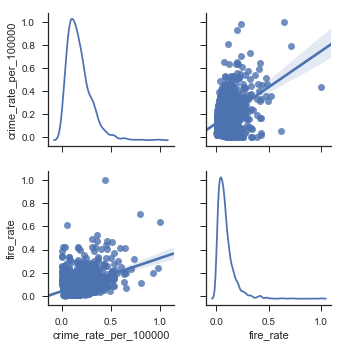

Coefficients: 
0.294527786295
Mean squared error: 0.01
Variance score: 0.16


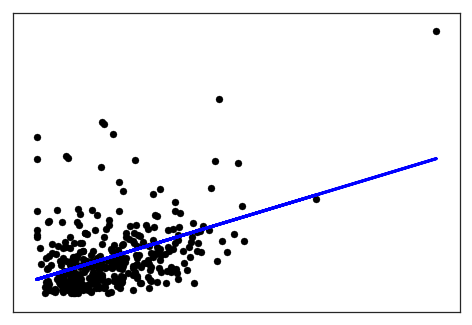

In [286]:
sns.pairplot(allData[['crime_rate_per_100000','fire_rate']], diag_kind="kde", kind="reg")
plt.show()


### do a linear regression crime_rate and fire_arm
X = allData['crime_rate_per_100000'].values.reshape((1496,1))
y = allData['fire_rate'].values.reshape((1496,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print 'Coefficients: \n', regr.coef_[0][0]
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

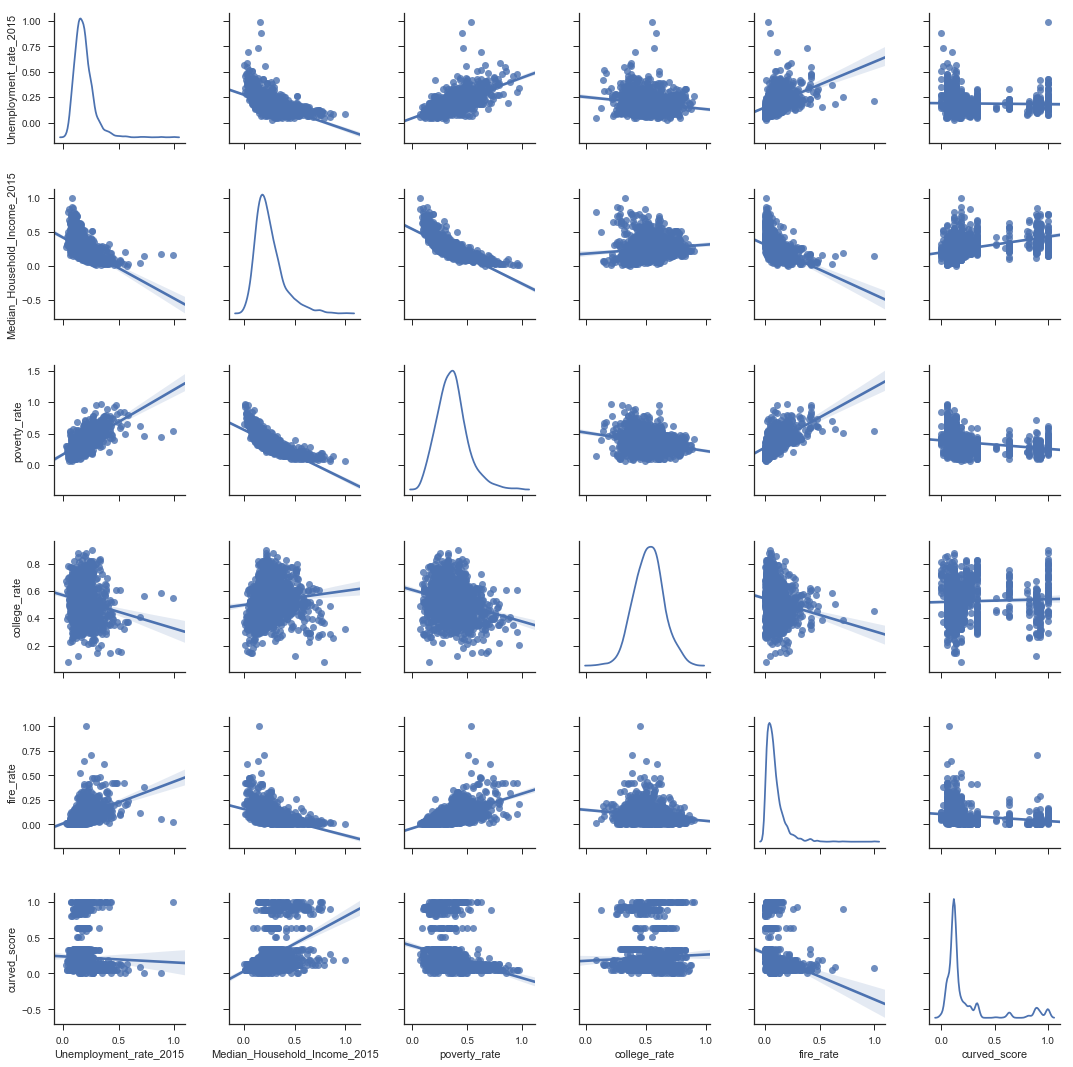

In [239]:
import seaborn as sns
#plot scatter, correlation 
sns.set(style="ticks")
#sns.pairplot(allData[['Unemployment_rate_2015','Median_Household_Income_2015','crime_rate_per_100000',
 #                     'poverty_rate','college_rate','fire_rate','curved_score']], diag_kind="kde", kind="reg")
sns.pairplot(allData[['Unemployment_rate_2015','Median_Household_Income_2015',
                      'poverty_rate','college_rate','fire_rate','curved_score']], diag_kind="kde", kind="reg")
plt.savefig('scatermatrix.eps', format='eps', dpi=600)
plt.show()

In [287]:
#write to file
allData.to_csv('allData.csv')
print allData.shape
allData.head(5)

(1496, 24)


,FIPStxt,State,Area_name,Unemployment_rate_2015,Median_Household_Income_2015,poverty_rate,FIPS Code,college_rate,county_name,crime_rate_per_100000,...,Unnamed: 0,County,County Code,Deaths,Population,Crude Rate,fire_rate,code,state,curved_score
0,01001,AL,"Autauga County, AL",0.156250,0.327029,0.252451,1001,0.549223,"Autauga County, AL",0.140403,...,NaN,"Autauga County, AL",1001,23.0,864759,2.7,0.058073,AL,Alabama,0.138554
1,01003,AL,"Baldwin County, AL",0.169643,0.286323,0.264706,1003,0.585492,"Baldwin County, AL",0.127281,...,NaN,"Baldwin County, AL",1003,68.0,2895650,2.3,0.050313,AL,Alabama,0.138554
2,01005,AL,"Barbour County, AL",0.312500,0.082898,0.664216,1005,0.443005,"Barbour County, AL",0.098928,...,NaN,"Barbour County, AL",1005,26.0,473640,5.5,0.128911,AL,Alabama,0.138554
3,01007,AL,"Bibb County, AL",0.218750,0.173514,0.431373,1007,0.484456,"Bibb County, AL",0.121463,...,NaN,"Bibb County, AL",1007,24.0,374837,6.4,0.151690,AL,Alabama,0.138554
4,01009,AL,"Blount County, AL",0.160714,0.267878,0.291667,1009,0.595855,"Blount County, AL",0.117640,...,NaN,"Blount County, AL",1009,35.0,940072,3.7,0.084606,AL,Alabama,0.138554


In [288]:
##Do clustering 

##PCA first
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [242]:
#data_cluster = allData[['Unemployment_rate_2015','Median_Household_Income_2015','crime_rate_per_100000','poverty_rate','college_rate']]
data_cluster = allData[['Unemployment_rate_2015','Median_Household_Income_2015','poverty_rate','college_rate']]
data_cluster.index = allData['Area_name']
data_cluster.head(5)

,Unemployment_rate_2015,Median_Household_Income_2015,poverty_rate,college_rate
Area_name,,,,
"Autauga County, AL",0.156250,0.327029,0.252451,0.549223
"Baldwin County, AL",0.169643,0.286323,0.264706,0.585492
"Barbour County, AL",0.312500,0.082898,0.664216,0.443005
"Bibb County, AL",0.218750,0.173514,0.431373,0.484456
"Blount County, AL",0.160714,0.267878,0.291667,0.595855
"Bullock County, AL",0.272321,0.052007,0.786765,0.220207
"Butler County, AL",0.258929,0.106537,0.517157,0.424870
"Calhoun County, AL",0.232143,0.186368,0.428922,0.577720
"Chambers County, AL",0.187500,0.122964,0.453431,0.512953


In [243]:
pca = PCA(n_components=2)
pca.fit(data_cluster)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [248]:
data_cluster_2d = pca.transform(data_cluster)
data_cluster_2d = pd.DataFrame(data_cluster_2d)
data_cluster_2d.index = data_cluster.index
data_cluster_2d.columns = ['PC1','PC2']
data_cluster_2d.head()

,PC1,PC2
Area_name,,
"Autauga County, AL",-0.138102,-0.001231
"Baldwin County, AL",-0.106711,-0.047388
"Barbour County, AL",0.364034,0.021812
"Bibb County, AL",0.112938,0.014843
"Blount County, AL",-0.081660,-0.062716


In [249]:
print(pca.explained_variance_ratio_) 

[ 0.63888184  0.23616353]


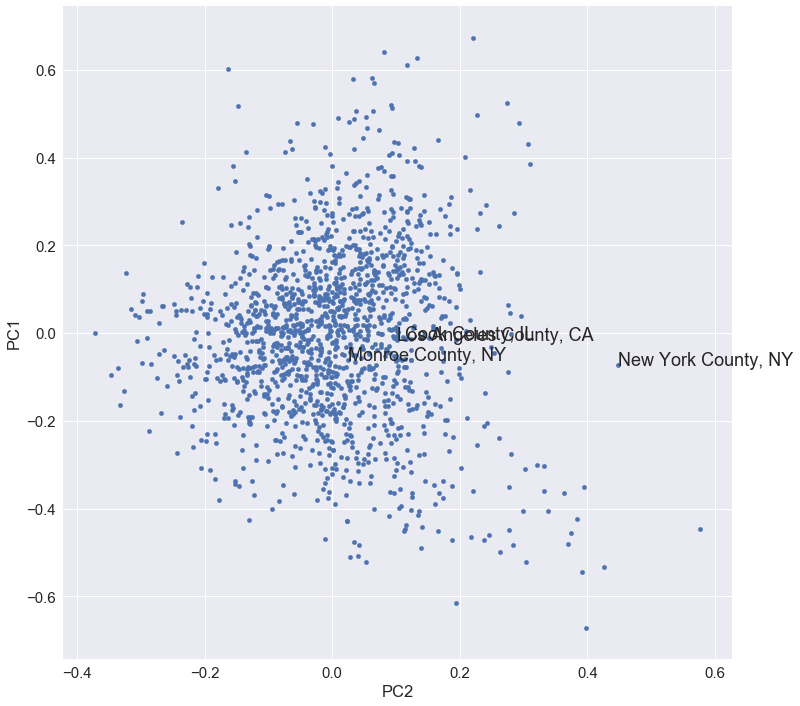

In [487]:
from random import *
countyPool = ['Los Angeles County, CA', 'San Francisco County, CA', 'Cook County, IL', 'Monroe County, NY', 'New York County, NY']
ax = data_cluster_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(12,12))

for i, country in enumerate(data_cluster_2d.index):
    if country in countyPool:
        ax.annotate(country, (data_cluster_2d.iloc[i].PC2, data_cluster_2d.iloc[i].PC1))

In [251]:
from sklearn.cluster import KMeans
n_clusters=6
kmeans = KMeans(n_clusters,random_state=25)
clusters = kmeans.fit(data_cluster_2d)

data_cluster_2d['cluster'] = pd.Series(clusters.labels_, index=data_cluster_2d.index)
#data_cluster_2d.head(10)
data_cluster_2d.to_csv('all_PCA_cluster.csv')

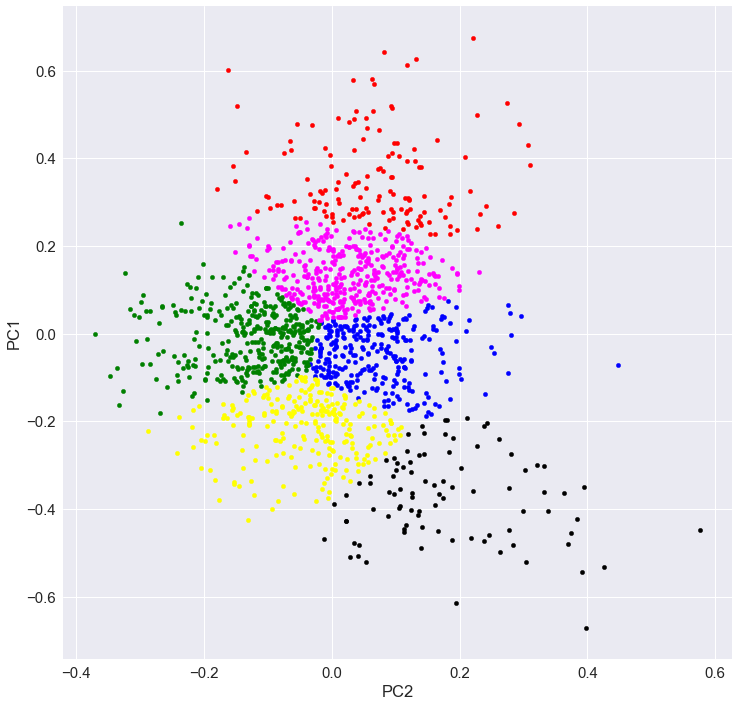

In [488]:
colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'yellow', 5:'magenta', 6:'orange', 7:'olive', 8:'olive'}
#data_cluster_2d['color'] = data_cluster_2d['cluster'].apply(lambda x: colors[x])
axk =data_cluster_2d.loc[data_cluster_2d['cluster']==0].plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=colors[0],
        figsize=(8,8))

for i in range(1, n_clusters):
    axk =data_cluster_2d.loc[data_cluster_2d['cluster']==i].plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=colors[i],
        figsize=(12,12),
        ax = axk)


/Users/Xin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



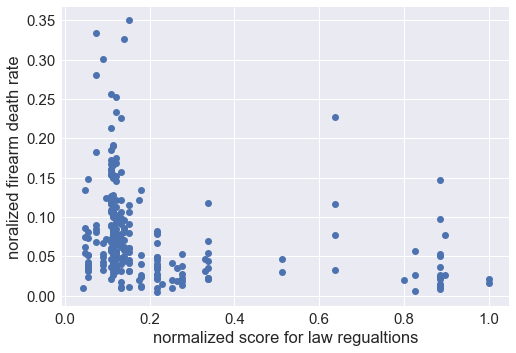

In [490]:
###since there seems to be only one cluster, try to use knn. The idea is intiliz a point, then find n neighors, then we can obeser
#the the associations between two variables.
#didn't use PCA here
from sklearn.neighbors import NearestNeighbors
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = data_cluster
n_neighbors=250
train_size = 4*n_neighbors/5
neigh = NearestNeighbors(n_neighbors)
neigh.fit(X) 

#give a county, find nearest index
inputVector = data_cluster.loc['Monroe County, NY'].values
distances, indices = neigh.kneighbors(inputVector)
#store fire_rate and score in a matrix
fireLaw = np.zeros((2,n_neighbors))
i = 0
for index in indices:
    for index_ in index:
       # allData.iloc[index_]['neighbor']  = 1
        fireLaw[0,i] = allData.iloc[index_]['curved_score']
        fireLaw[1,i] = allData.iloc[index_]['fire_rate']
        i += 1
smallData = pd.DataFrame(data=fireLaw[0,:])
smallData.columns = ['curved_score']
smallData['fire_rate'] = fireLaw[1,:]
smallData=smallData.sort_values(by=['curved_score'])
plt.plot(smallData['curved_score'], smallData['fire_rate'],'o')
plt.xlabel('normalized score for law regualtions')
plt.ylabel('noralized firearm death rate')

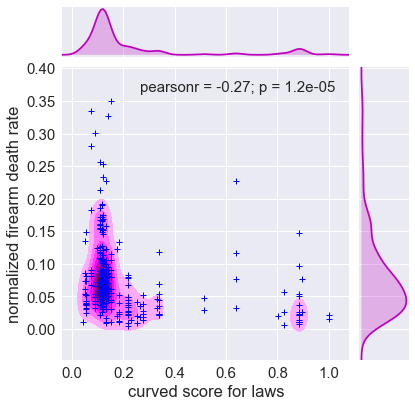

In [491]:
#a correlation between the two
g = sns.jointplot(x='curved_score', y='fire_rate', data=smallData[['curved_score','fire_rate']], kind="kde", color="m");
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curved score for laws", "normalized firearm death rate");
sns.set(font_scale=1.5)

In [291]:
#Do a multilayer regression, trained only by fire_rate and law
#results very bad
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score

nn = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu')
trainData = fireLaw[0,:].reshape((n_neighbors,1))
targetData = fireLaw[1,:].reshape((n_neighbors,1))
kf = KFold(10)
scores = cross_val_score(nn, trainData, targetData, cv=10, scoring='r2')
print scores.mean()
nn.fit(trainData, trainData)

-1.62724580566


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

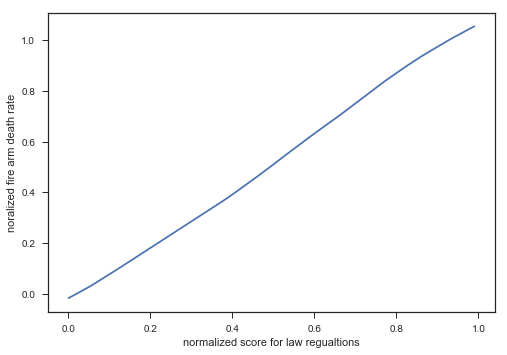

In [292]:
score = np.arange(0,1,0.01)
fire_predict = np.zeros(len(score))
for i in range(len(score)):
    fire_predict[i] = nn.predict((score[i]))

plt.plot(score, fire_predict)
plt.xlabel('normalized score for law regualtions')
plt.ylabel('noralized fire arm death rate')

Coefficients: 
-0.0327870860793
Mean squared error: 0.00
Variance score: 0.07


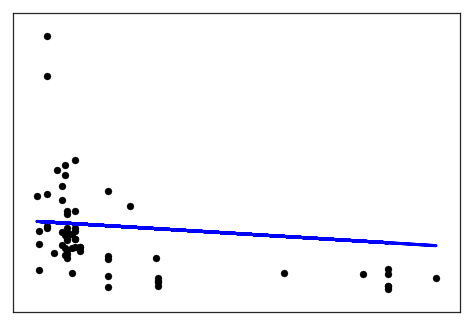

In [290]:
### do a linear regression for fire_rate and law
X = fireLaw[0,:].reshape((n_neighbors,1))
y = fireLaw[1,:].reshape((n_neighbors,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print 'Coefficients: \n', regr.coef_[0][0]
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [71]:
##multi layer perceptron regression 

In [399]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score

nn = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu')
#trainData = allData[['Unemployment_rate_2015','Median_Household_Income_2015','crime_rate_per_100000',
#                      'poverty_rate','college_rate','curved_score']].values

X = allData[['Unemployment_rate_2015','Median_Household_Income_2015',
                      'poverty_rate','college_rate','curved_score']].values
y = allData['fire_rate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

#select 
X_fips = allData.index.values
y_fips = allData.index.values
X_fips_train, X_fips_test, y_fips_train, y_fips_test = train_test_split(X_fips, y_fips, test_size=0.2, random_state=45)
testData = allData.iloc[X_fips_test]


kf = KFold(10)
scores = cross_val_score(nn, X, y, cv=10, scoring='r2')
print scores.mean()
nn.fit(trainData, targetData)

0.245782231956


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

/Users/Xin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Xin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                  Area_name  difference_nn
839     Dutchess County, NY       1.519406
1300     Midland County, TX       2.999176
110      Lincoln County, AR       5.736411
1399       Scott County, VA       1.831656
809       Warren County, NJ       1.984482
1234      Austin County, TX       2.074393
1337      Waller County, TX       5.470114
726        Barry County, MO       4.266677
1288     Johnson County, TX       0.792569
1129   Fairfield County, SC       4.134528
13      Cleburne County, AL       8.506203
352        Upson County, GA       7.211578
793       Camden County, NJ      10.199644
976     Lawrence County, OH       5.563575
297       Fannin County, GA       1.560105
823   Rio Arriba County, NM       0.881494
1452       Boone County, WV       6.697932
448        Scott County, IA       2.248102
43       Marengo County, AL       3.091272
1352  Chittenden County, VT       1.748996


/Users/Xin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



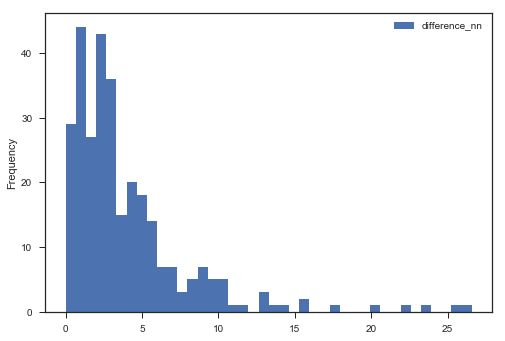

In [451]:

testData['predict_nn'] = nn.predict(testData[['Unemployment_rate_2015','Median_Household_Income_2015',
                      'poverty_rate','college_rate','curved_score']].values)
testData['difference_nn'] = 100*(testData['fire_rate'] - testData['predict_nn'])
testData['difference_nn'] = testData['difference_nn'].abs()
print testData[['Area_name','difference_nn']].head(20)
testData[['difference_nn']].plot.hist(bins=40)

#Gaussian naive baysein
trainData = allData[['Unemployment_rate_2015','Median_Household_Income_2015','crime_rate_per_100000',
                      'poverty_rate','college_rate','curved_score']].values

labels, bins = pd.qcut(allData['fire_rate'].values, q=30, duplicates='drop', retbins=True, labels=False)
X = trainData
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, labels)


score = np.arange(0,1,0.01)
predict_mean = np.zeros(len(score))
for i in range(len(score)):
    predict_label = clf.predict([[0.1,0.2,0.4,0.2,0.1,score[i]]])
    predict_mean[i] = (bins[predict_label] + bins[predict_label+1] )/2.0
plt.plot(score, predict_mean)
plt.xlabel('normalized score for law regualtions')
plt.ylabel('nor')

#3D contour plot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score
allData['curved_score'].head(5)

nn = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu')
trainData = data_cluster_2d[['PC1','PC2']]
targetData = allData['fire_rate'].values
kf = KFold(10)
scores = cross_val_score(nn, trainData, targetData, cv=10, scoring='r2')
print scores.mean()
nn.fit(trainData, targetData)

score = np.arange(0,1,0.01)
fire_predict = np.zeros(len(score))
for i in range(len(score)):
    fire_predict[i] = nn.predict((0.25,score[i]))

plt.plot(score, fire_predict)
plt.xlabel('normalized score for law regualtions')
plt.ylabel('nor')


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0, 1)
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [265]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [401]:
#trainData = allData[['Unemployment_rate_2015','Median_Household_Income_2015','crime_rate_per_100000',
#                      'poverty_rate','college_rate','curved_score']].values

X = allData[['Unemployment_rate_2015','Median_Household_Income_2015',
                      'poverty_rate','college_rate','curved_score']].values
y = allData['fire_rate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

#select 
X_fips = allData.index.values
y_fips = allData.index.values
X_fips_train, X_fips_test, y_fips_train, y_fips_test = train_test_split(X_fips, y_fips, test_size=0.2, random_state=45)
testData = allData.iloc[X_fips_test]
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [402]:
print(regr.feature_importances_)

[ 0.10051916  0.26558681  0.39631818  0.10772834  0.12984751]


/Users/Xin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Xin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Xin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

                  Area_name  difference_rf
839     Dutchess County, NY       0.319650
1300     Midland County, TX       2.734668
110      Lincoln County, AR       8.219024
1399       Scott County, VA       2.568210
809       Warren County, NJ       0.711723
1234      Austin County, TX       0.472257
1337      Waller County, TX       4.465582
726        Barry County, MO       4.055069
1288     Johnson County, TX       2.555695
1129   Fairfield County, SC       6.035044
13      Cleburne County, AL      10.241135
352        Upson County, GA       5.739675
793       Camden County, NJ      10.250313
976     Lawrence County, OH       5.579474
297       Fannin County, GA       1.772215
823   Rio Arriba County, NM       3.354193
1452       Boone County, WV       8.438048
448        Scott County, IA       0.130788
43       Marengo County, AL       4.551523
1352  Chittenden County, VT       2.247810


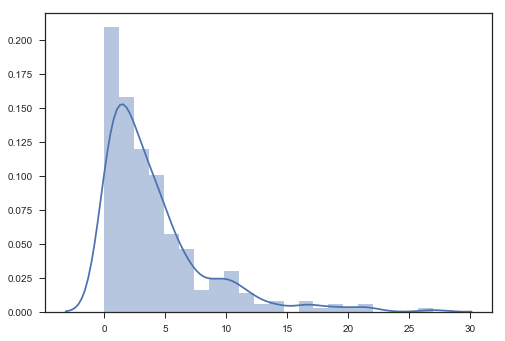

In [452]:
#Crude rate used to store RF precdition
testData['predict_rf'] = regr.predict(testData[['Unemployment_rate_2015','Median_Household_Income_2015',
                      'poverty_rate','college_rate','curved_score']].values)
testData['difference_rf'] = 100*(testData['fire_rate'] - testData['predict_rf'])
testData['difference_rf'] = testData['difference_rf'].abs()
print testData[['Area_name','difference_rf']].head(20)
g = sns.distplot(testData[['difference_rf']])
#g.set_axis_labels("density", "prediction accuracy");

In [481]:
#store ground truth and 
testData.to_csv('testData.csv')

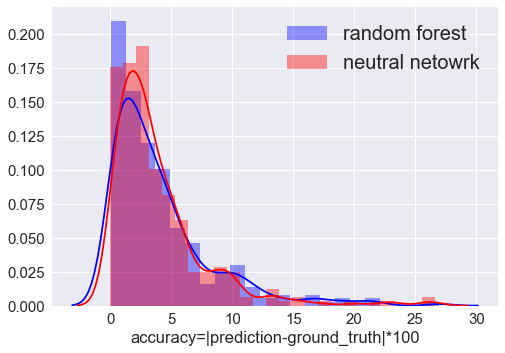

In [485]:
sns.distplot(testData[['difference_rf']], color="blue", label="random forest",axlabel = 'accuracy=|prediction-ground_truth|*100')
sns.distplot(testData[['difference_nn']], color="red", label="neutral netowrk")
sns.plt.legend(fontsize=20)
sns.set(font_scale=1.5)